# Exploratory Data Analysis

## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = pathlib.Path("../../data/cell2cell")

## 2. Download and load the data

In [6]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("jpacse/datasets-for-churn-telecom")
print("Path to dataset files:", path)

100%|███████████████████████████████| 3.92M/3.92M [00:00<00:00, 7.65MB/s]

Extracting files...


Path to dataset files: /Users/wenyechen/.cache/kagglehub/datasets/jpacse/datasets-for-churn-telecom/versions/2


In [2]:
train_df = pd.read_csv(DATA_DIR / 'cell2celltrain.csv')
test_df=pd.read_csv(DATA_DIR / 'cell2cellholdout.csv')

In [8]:
print(f"shape is: {train_df.shape}")
train_df.head()

shape is: (51047, 58)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## 3. Data analysis

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## 3.1 get the missing values for each column in the DataFrame

In [10]:
missing_summary = pd.DataFrame({
    'Missing Count': train_df.isnull().sum(),
    'Missing %': (train_df.isnull().sum() / len(train_df)) * 100
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]  # optional: filter out non-missing
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)
missing_summary

,Missing Count,Missing %
AgeHH1,909,1.780712
AgeHH2,909,1.780712
PercChangeMinutes,367,0.718945
PercChangeRevenues,367,0.718945
MonthlyRevenue,156,0.305601
MonthlyMinutes,156,0.305601
TotalRecurringCharge,156,0.305601
DirectorAssistedCalls,156,0.305601
OverageMinutes,156,0.305601
RoamingCalls,156,0.305601


## 3.2 User Churn Distribution

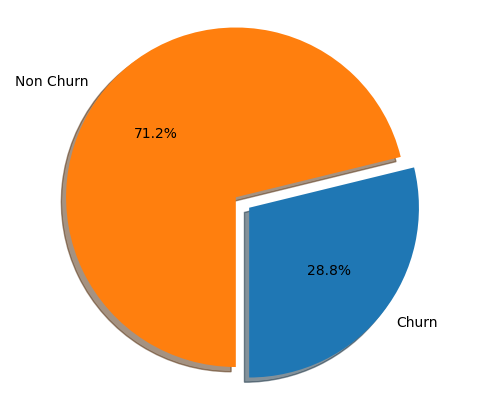

In [35]:
churn=train_df[train_df['Churn']=='Yes'].shape[0]
non_churn= train_df[train_df['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Churn','Non Churn']
explode=[0.1,0]

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

In [57]:
tenure_yes = (
    train_df.loc[train_df.Churn == 'Yes', 'MonthsInService']
             .value_counts()
             .rename('Churn')
)

tenure_no  = (
    train_df.loc[train_df.Churn == 'No', 'MonthsInService']
             .value_counts()
             .rename('NoChurn')
)

tenure = (
    pd.concat([tenure_yes, tenure_no], axis=1)
      .fillna(0)                 # replace NaNs with 0
      .sort_index()              # tenure on the x-axis in order
      .astype(int)
      .reset_index()                 # ← converts the index into a column
      .rename(columns={'index': 'MonthsInService'})
)

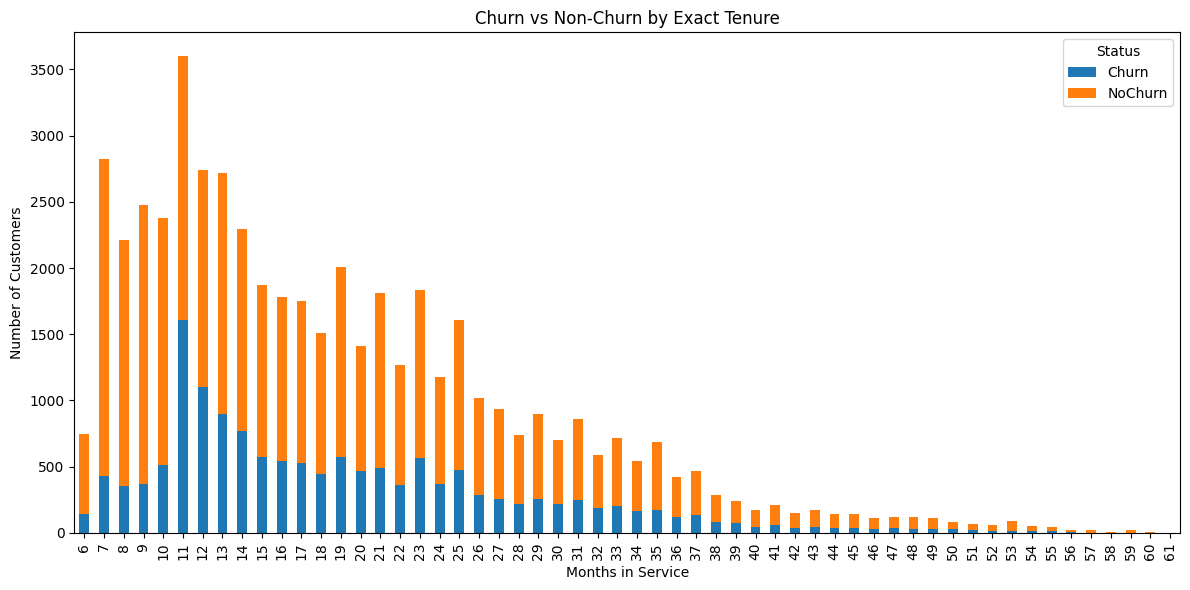

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
tenure.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Months in Service')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn vs Non-Churn by Exact Tenure')
ax.legend(title='Status')

plt.tight_layout()
plt.show()

/var/folders/w_/bd5qzspx3kvg9_g_7l7s3z000000gn/T/ipykernel_9330/381780495.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure.groupby('TenureBin')[['Churn', 'NoChurn']]


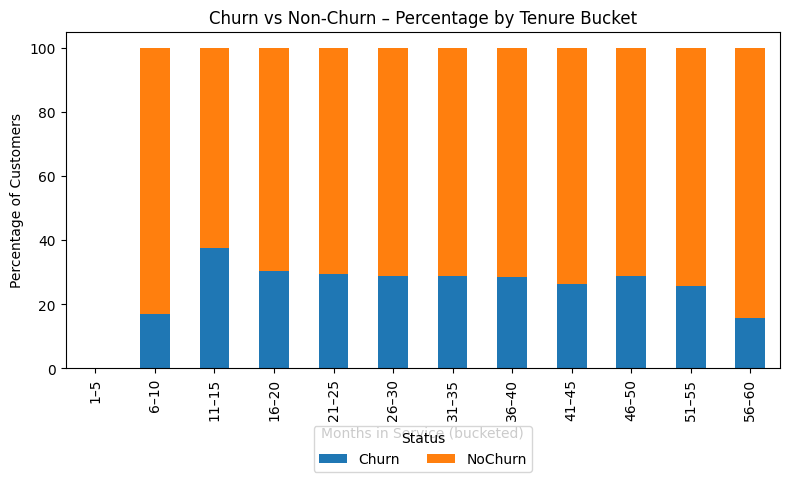

In [70]:
bins   = list(range(0, 65, 5))           # [0, 5, 10, …, 60]
labels = [f'{i+1}–{i+5}' for i in bins[:-1]]   # ['1–5', '6–10', …, '56–60']

tenure['TenureBin'] = pd.cut(
    tenure['MonthsInService'],
    bins=bins,
    labels=labels,
    right=True,        # right edge is inclusive, so 10 falls into 1-10
    include_lowest=True
)

bucket_counts = (
    tenure.groupby('TenureBin')[['Churn', 'NoChurn']]
          .sum()                       # raw counts per bucket
)

bucket_pct = (
    bucket_counts
      .div(bucket_counts.sum(axis=1), axis=0)   # divide by bucket total
      .mul(100)                                 # convert to %
      .round(2)
)

fig, ax = plt.subplots(figsize=(8, 5))

bucket_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax
)

ax.set_ylabel('Percentage of Customers')
ax.set_xlabel('Months in Service (bucketed)')
ax.set_title('Churn vs Non-Churn – Percentage by Tenure Bucket')
ax.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

## 3.2 Feature selection

For Numerical Features: Use Correlation (e.g., point biserial correlation)

In [9]:
from scipy.stats import pointbiserialr

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [10]:


# Filter numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation with Churn (binary encoded)
train_df['Churn_binary'] = train_df['Churn'].map({'No': 0, 'Yes': 1})

correlations = {}
for col in numerical_cols:
    corr, _ = pointbiserialr(train_df[col].dropna(), train_df['Churn_binary'][train_df[col].notnull()])
    correlations[col] = abs(corr)

# Sort by absolute correlation
sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

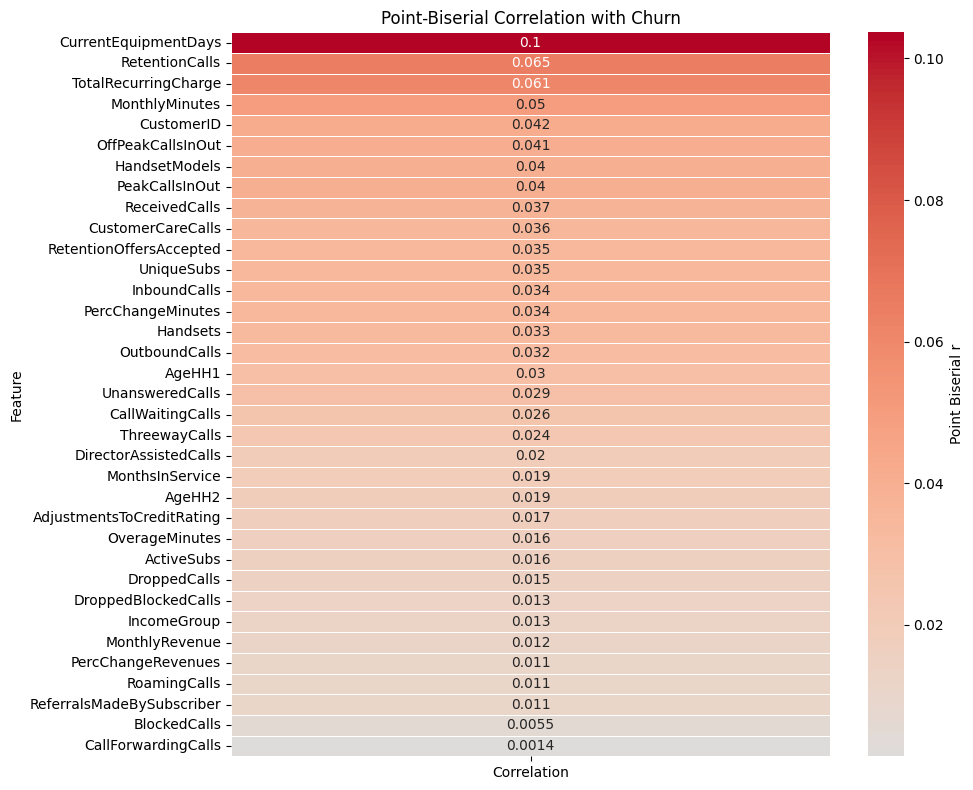

In [11]:
corr_df = (
    pd.DataFrame(sorted_corr, columns=['Feature', 'Correlation'])
      .set_index('Feature')
)

# 4️⃣ Heat-map
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df,
    cmap='coolwarm',
    center=0,          # white at zero → easy to see direction
    annot=True,
    linewidths=.5,
    cbar_kws={'label': 'Point Biserial r'}
)
plt.title('Point-Biserial Correlation with Churn')
plt.tight_layout()
plt.show()

 For Categorical Features: Use Chi-Squared Test

In [27]:
# Prepare categorical features
cat_cols = train_df.select_dtypes(include='object').drop(columns=['Churn']).columns

# Encode categorical variables
X_cat = train_df[cat_cols].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))
y = LabelEncoder().fit_transform(train_df['Churn'])

# Perform chi-squared test
chi_scores, _ = chi2(X_cat, y)

# Create and sort dataframe
chi2_df = pd.DataFrame({'Feature': cat_cols, 'Chi2 Score': chi_scores})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)

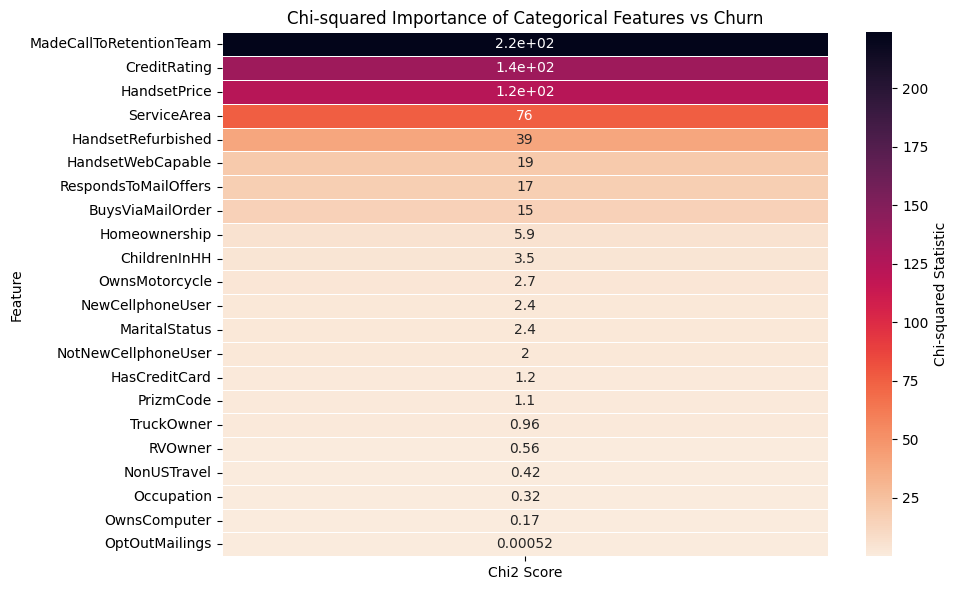

In [28]:
heat_df = chi2_df.set_index('Feature')[['Chi2 Score']]   # keep scores, drop p-values in heat-map

plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_df,
    cmap='rocket_r',          # nice dark-to-light palette
    annot=True,
    linewidths=.5,
    cbar_kws={'label': 'Chi-squared Statistic'}
)
plt.title('Chi-squared Importance of Categorical Features vs Churn')
plt.tight_layout()
plt.show()

## Data analysis summary
1. This missing data percentage for each column is small.
2. Non-churn vs Churn is 71.2% VS 28.8%. The dataset is imbalanced.
3. Churn rate peaking right after the first-year mark and steadily falling with tenure
4. Behavioural touchpoints dominate, MadeCallToRetentionTeam, RespondsToMailOffers, BuysViaMailOrder all indicate interaction with the company → strong churn signal.
5. Customer profile / credit factors matter, CreditRating, HandsetPrice, Homeownership show financial capability or device investment levels tied to churn likelihood.
6. Lifestyle & demographic extras have little standalone signal

# 4. Feature engineering

In [3]:
train_df['Churn_binary'] = train_df['Churn'].map({'No': 0, 'Yes': 1})
print(train_df['Churn_binary'].value_counts())

Churn_binary
0    36336
1    14711
Name: count, dtype: int64


# 5. Baseline model

In [4]:
 # 0. Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.impute import SimpleImputer
from tqdm import tqdm

# 1. Separate features & target
y = train_df['Churn_binary'].astype(int)          # ensure 0/1 integers
X = train_df.drop(columns=['Churn_binary', 'Churn'])


# 2. Identify feature types
numeric_cols = X.select_dtypes(include=['number']).columns.to_list()
categorical_cols = X.select_dtypes(exclude=['number']).columns.to_list()

# 3. Pre-processing blocks
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, numeric_cols),
    ('cat', categorical_pipe, categorical_cols)
])

# 4. Baseline model-in-a-pipeline
baseline_clf = Pipeline([
    ('prep', preprocess),
    ('logreg', LogisticRegression(
        penalty='l2',        # default, but spelled out for clarity
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced'   # helps when churn is rare
    ))
])

# 5. Hold-out split for a quick sanity check
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [16]:
# 6. Train the model
baseline_clf.fit(X_train, y_train)

,steps,"[('prep', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
val_pred = baseline_clf.predict(X_val)
val_proba = baseline_clf.predict_proba(X_val)[:, 1]

print("Accuracy :", round(accuracy_score(y_val, val_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_val, val_proba),4))
print("Confusion matrix:\n", confusion_matrix(y_val, val_pred))
print("\nDetailed report:\n", classification_report(y_val, val_pred, target_names=["No Churn", "Churn"]))

Accuracy : 0.5819
ROC-AUC  : 0.6121
Confusion matrix:
 [[4246 3022]
 [1247 1695]]

Detailed report:
               precision    recall  f1-score   support

    No Churn       0.77      0.58      0.67      7268
       Churn       0.36      0.58      0.44      2942

    accuracy                           0.58     10210
   macro avg       0.57      0.58      0.55     10210
weighted avg       0.65      0.58      0.60     10210



In [23]:
# 7. (Optional) Cross-validated performance for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(
    baseline_clf, X, y, cv=cv, scoring='roc_auc'
)
print(f"5-fold ROC-AUC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

5-fold ROC-AUC: 0.6145 ± 0.0031


In [5]:
# 8 Train/test split and save
DATA_DIR = pathlib.Path("../../data/Churn")
train_path = DATA_DIR / "Churn_train.parquet"
test_path  = DATA_DIR / "Churn_test.parquet"

In [6]:
train_df = X_train.copy()
train_df["Churn"] = y_train
test_df  = X_val.copy()
test_df["Churn"]  = y_val

train_df.to_parquet(train_path, index=False)
test_df.to_parquet(test_path,  index=False)

print(f"Saved {train_path.relative_to(DATA_DIR.parent)}  ({len(train_df)} rows)")
print(f"Saved {test_path.relative_to(DATA_DIR.parent)}   ({len(test_df)} rows)")

Saved Churn/Churn_train.parquet  (40837 rows)
Saved Churn/Churn_test.parquet   (10210 rows)


In [4]:
# load from train/test set, to see the distribution of Churn data
# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Check distribution of "Churn" in train and test sets
print("Train Churn Distribution:")
print(train_df['Churn'].value_counts(normalize=True).round(4))  # Shows percentage
print(train_df['Churn'].value_counts())  # Shows raw counts

print("\nTest Churn Distribution:")
print(test_df['Churn'].value_counts(normalize=True).round(4))
print(test_df['Churn'].value_counts())

Train Churn Distribution:
Churn
0    0.7118
1    0.2882
Name: proportion, dtype: float64
Churn
0    29068
1    11769
Name: count, dtype: int64

Test Churn Distribution:
Churn
0    0.7119
1    0.2881
Name: proportion, dtype: float64
Churn
0    7268
1    2942
Name: count, dtype: int64
